## **NFL PLAYERS BY RACE (BY HOME COUNTRY CLASSIFICATION)** <a id="1"></a>

<a><img style="float: right;" src="https://www.linkpicture.com/q/nfl_1.jpg" width="300" /></a>
 



- Dataset source: https://www.kaggle.com/datasets/toddsteussie/nfl-play-statistics-dataset-2004-to-present

### Notebook Preparation <a id="1.2"></a>

This part of the notebook deals with the relevant library import and visual configuration.

In [158]:
# Import libraries

import pandas as pd
import numpy as np 
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.express as px

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_samples, silhouette_score

In [159]:
# Set notebook options

pd.options.display.max_columns = 30

import warnings
warnings.filterwarnings("ignore")

## **2. Data Preparation** <a id="2"></a>

The below section provides an initial exploration of the data.

In [160]:
# Import the data as a DataFrame and check first 5 rows

df = pd.read_csv('nfl_players_homecountry.csv')

df.head(5)

,playerId,nameFirst,nameLast,nameFull,position,collegeId,nflId,combineId,college,heightInches,weight,dob,ageAtDraft,playerProfileUrl,homeCity,homeState,homeCountry,highSchool,hsCity,hsState,hsCountry
0,19770001,Ricky,Bell,Ricky Bell,RB,90089,2509366,NaN,USC,74.0,220.0,1955-04-08,22.084932,http://www.nfl.com/player/RickyBell/2509366/pr...,Houston,TX,USA,NaN,NaN,NaN,NaN
1,19770002,Tony,Dorsett,Tony Dorsett,RB,15260,2513084,NaN,Pittsburgh,71.0,192.0,1954-04-07,23.087671,http://www.nfl.com/player/TonyDorsett/2513084/...,Rochester,PA,USA,NaN,NaN,NaN,NaN
2,19770003,Eddie,Edwards,Eddie Edwards,DE,33124,2513479,NaN,Miami (FL),77.0,256.0,1954-04-25,23.038356,http://www.nfl.com/player/EddieEdwards/2513479...,Sumter,SC,USA,NaN,NaN,NaN,NaN
3,19770004,Marvin,Powell,Marvin Powell,OT,90089,2523462,NaN,USC,77.0,268.0,1955-08-30,21.690411,http://www.nfl.com/player/MarvinPowell/2523462...,Los Angeles,CA,USA,NaN,NaN,NaN,NaN
4,19770005,Gary,Jeter,Gary Jeter,DE,90089,2517530,NaN,USC,76.0,259.0,1955-01-24,22.287671,http://www.nfl.com/player/GaryJeter/2517530/pr...,Weirton,WV,USA,NaN,NaN,NaN,NaN


In [161]:
# Let us count the number of records in the dataset.

df.shape

(23295, 21)

- There are 23,295 rows and 21 columns in the dataset.

In [162]:
# Check data types and if any records are missing

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23295 entries, 0 to 23294
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   playerId          23295 non-null  int64  
 1   nameFirst         23295 non-null  object 
 2   nameLast          23295 non-null  object 
 3   nameFull          23295 non-null  object 
 4   position          23294 non-null  object 
 5   collegeId         23295 non-null  int64  
 6   nflId             20959 non-null  object 
 7   combineId         10097 non-null  float64
 8   college           23295 non-null  object 
 9   heightInches      20709 non-null  float64
 10  weight            20709 non-null  float64
 11  dob               20226 non-null  object 
 12  ageAtDraft        20226 non-null  float64
 13  playerProfileUrl  20959 non-null  object 
 14  homeCity          15618 non-null  object 
 15  homeState         15231 non-null  object 
 16  homeCountry       15715 non-null  object

- Seems we have missing records in our datasets.
- Let us count the number of missing records in each column.

In [163]:
# Let us count the number of missing records in each column of our dataset.

df.isnull().sum()

playerId                0
nameFirst               0
nameLast                0
nameFull                0
position                1
collegeId               0
nflId                2336
combineId           13198
college                 0
heightInches         2586
weight               2586
dob                  3069
ageAtDraft           3069
playerProfileUrl     2336
homeCity             7677
homeState            8064
homeCountry          7580
highSchool          15792
hsCity              19212
hsState             15847
hsCountry           15792
dtype: int64

- Obviously, we have some missing records in some columns of our dataset. However, we are only interested in the 'homeCountry' column. Unfortunately, there are  7580 missing 'homeCountry' records in the dataset. Let us delete the missing 'homeCountry' records to make our dataset clean for homecountry classification analysis.

In [164]:
# We are deleting rows with missing 'homeCountry' records

df = df.dropna(subset=['homeCountry'])

In [165]:
# Let us check if we still have missing 'homeCountry' records in the NFL dataset.

df.isnull().sum()

playerId                0
nameFirst               0
nameLast                0
nameFull                0
position                1
collegeId               0
nflId                   7
combineId            8127
college                 0
heightInches         1039
weight               1039
dob                    60
ageAtDraft             60
playerProfileUrl        7
homeCity               97
homeState             484
homeCountry             0
highSchool           9004
hsCity              12160
hsState              9051
hsCountry            9004
dtype: int64

- Great! No more missing record in 'homeCountry' column. Our dataset is clean, we can proceed with our data analysis.

- Let us check the total records in the dataset after deleting the missing records.

In [166]:
df.shape

(15715, 21)

- We still have 15,715 rows and 21 columns in the dataset. Sizeably good for our home country analysis.

In [167]:
# Let us view some basic statistical information about our cleaned NFL dataset.

df.describe()

,playerId,collegeId,combineId,heightInches,weight,ageAtDraft
count,1.571500e+04,15715.000000,7588.000000,14676.000000,14676.000000,15655.000000
mean,2.002136e+07,54034.291441,15319.747364,73.815413,240.641455,22.814027
std,1.111284e+05,26608.539657,2866.791371,2.609287,44.742963,0.877432
min,1.977000e+07,1.000000,10000.000000,65.000000,142.000000,19.523288
25%,1.994005e+07,32306.000000,13018.750000,72.000000,203.000000,22.227397
50%,2.004023e+07,48824.000000,15487.500000,74.000000,234.000000,22.805479
75%,2.011071e+07,77843.000000,17607.250000,76.000000,275.000000,23.326027
max,2.019120e+07,99362.000000,20500.000000,82.000000,388.000000,34.326027


- Maximum height of NFL player in our dataset = 82 inches
- Lowest height of NFL player in our dataset = 65 inches
- Average height of NFL players in our dataset = 73.81 inches

## HomeCountry Exploration <a id="3"></a>

In [168]:
# import libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [169]:
# Let us count the number of unique countries and the respective number of players.

df['homeCountry'].value_counts(ascending=True)

Iran                    1
Marshall Islands        1
Thailand                1
Belgium                 1
Kenya                   1
                    ...  
Nigeria                36
Jamaica                49
Germany                77
Canada                 87
USA                 15235
Name: homeCountry, Length: 70, dtype: int64

- There are 70 unique homeCountry.
- Let us again count the number of unique homeCountry in the dataset using 'groupby' method.

In [170]:
# Group by homeCountry and count the number of unique homeCountry. 

df.groupby(['homeCountry']).count()

,playerId,nameFirst,nameLast,nameFull,position,collegeId,nflId,combineId,college,heightInches,weight,dob,ageAtDraft,playerProfileUrl,homeCity,homeState,highSchool,hsCity,hsState,hsCountry
homeCountry,,,,,,,,,,,,,,,,,,,,
Angola,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1
Argentina,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,0,1,0,1,1
Australia,16,16,16,16,16,16,16,5,16,16,16,16,16,16,15,0,6,5,1,6
Bahamas,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,0,0,0,0,0
Barbados,4,4,4,4,4,4,4,1,4,4,4,4,4,4,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uganda,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,0,0,0,0,0
Ukraine,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1
Yugoslavia,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0


- There are 70 unique homeCountries in our dataset. For the purpose of simplicity and clarity, Let us group these homeCountries into 20 groups as follows;

- Group 1 = USA.
- Group 2 = UK.
- Group 3 = Italy. 
- Group 4 = Germany.
- Group 5 = France.
- Group 6 = Canada.
- Group 7 = Netherlands.
- Group 8 = Japan.
- Group 9 = Brazil.
- Group 10 = Jamaica.
- Group 11 = Australia.
- Group 12 = Spain.
- Group 13 = Argentina.
- Group 14 = Sweden.
- Group 15 = Poland.
- Group 16 = Norway.
- Group 17 = Denmark.
- Group 18 = Ghana.
- Group 19 = Nigeria.
- Group 20 = Rest of the World.

In [171]:
 # Counting number of NFL players whose Home Country = USA

usa = (df['homeCountry']=='USA').sum()
usa

15235

In [172]:
 # Counting number of NFL players whose Home Country = UK

uk = (df['homeCountry']=='UK').sum()
uk

24

In [173]:
 # Counting number of NFL players whose Home Country = Italy

italy = (df['homeCountry']=='Italy').sum()
italy

6

In [174]:
 # Counting number of NFL players whose Home Country = Germany
germany = (df['homeCountry']=='Germany').sum()
germany

77

In [175]:
 # Counting number of NFL players whose Home Country = France

france = (df['homeCountry']=='France').sum()
france

3

In [176]:
 # Counting number of NFL players whose Home Country = Canada

canada = (df['homeCountry']=='Canada').sum()
canada

87

In [177]:
 # Counting number of NFL players whose Home Country = Netherlands

netherlands = (df['homeCountry']=='Netherlands').sum()
netherlands

5

In [178]:
 # Counting number of NFL players whose Home Country = Japan

japan = (df['homeCountry']=='Japan').sum()
japan

12

In [179]:
 # Counting number of NFL players whose Home Country = Brazil

brazil = (df['homeCountry']=='Brazil').sum()
brazil

2

In [180]:
  # Counting number of NFL players whose Home Country = Jamaica

jamaica = (df['homeCountry']=='Jamaica').sum()
jamaica

49

In [181]:
 # Counting number of NFL players whose Home Country = Australia

australia = (df['homeCountry']=='Australia').sum()
australia

16

In [182]:
  # Counting number of NFL players whose Home Country = Spain

spain = (df['homeCountry']=='Spain').sum()
spain

3

In [183]:
  # Counting number of NFL players whose Home Country = Argentina

argentina = (df['homeCountry']=='Argentina').sum()
argentina

2

In [184]:
 # Counting number of NFL players whose Home Country = Sweden

sweden = (df['homeCountry']=='Sweden').sum()
sweden

5

In [185]:
 # Counting number of NFL players whose Home Country = Poland

poland = (df['homeCountry']=='Poland').sum()
poland

3

In [186]:
 # Counting number of NFL players whose Home Country = Norway

norway = (df['homeCountry']=='Norway').sum()
norway

4

In [187]:
 # Counting number of NFL players whose Home Country = Denmark

denmark = (df['homeCountry']=='Denmark').sum()
denmark

2

In [188]:
 # Counting number of NFL players whose Home Country = Ghana

ghana = (df['homeCountry']=='Ghana').sum()
ghana

5

In [189]:
 # Counting number of NFL players whose Home Country = Nigeria

nigeria = (df['homeCountry']=='Nigeria').sum()
nigeria

36

In [190]:
  # Counting number of NFL players from the rest of the world

rest_of_the_world = len(df['homeCountry']) - usa - uk - italy - germany - france - canada - netherlands - japan - brazil - jamaica - australia - spain - argentina - sweden - poland - norway - denmark - ghana - nigeria
rest_of_the_world

139

In [191]:
# Create a DataFrame based on the home country groupings created above
dataframe = pd.DataFrame()

# Add columns
dataframe['homeCountry'] = ['USA', 'UK', 'Italy', 'Germany', 'France', 'Canada', 'Netherlands', 'Japan', 'Brazil', 'Jamaica', 'Australia', 'Spain', 'Argentina', 'Sweden', 'Poland', 'Norway', 'Denmark', 'Ghana', 'Nigeria', 'Rest of the World']
dataframe['Number of NFL Players'] = [usa, uk, italy, germany, france, canada, netherlands, japan, brazil, jamaica, australia, spain, argentina, sweden, poland, norway, denmark, ghana, nigeria, rest_of_the_world]

# Show DataFrame
dataframe

,homeCountry,Number of NFL Players
0,USA,15235
1,UK,24
2,Italy,6
3,Germany,77
4,France,3
5,Canada,87
6,Netherlands,5
7,Japan,12
8,Brazil,2
9,Jamaica,49


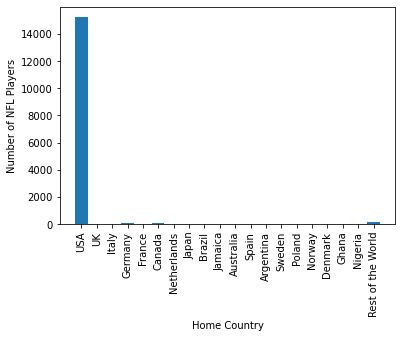

In [201]:
# Let us visualize the bar chart of NFL players and their homeCountry.

x = dataframe["homeCountry"]
y = dataframe["Number of NFL Players"]
plt.bar(x,y,align='center') # A bar chart
plt.xticks(rotation = 90)
plt.xlabel('Home Country')
plt.ylabel('Number of NFL Players')
plt.show()

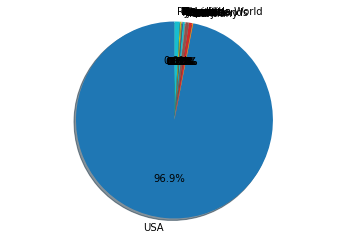

<Figure size 1440x1080 with 0 Axes>

In [202]:
# Let us plot pie chart
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

labels = x = dataframe["homeCountry"]
data = dataframe["Number of NFL Players"]


fig1, ax1 = plt.subplots()
ax1.pie(data, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
fig = plt.figure(figsize =(20, 15))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

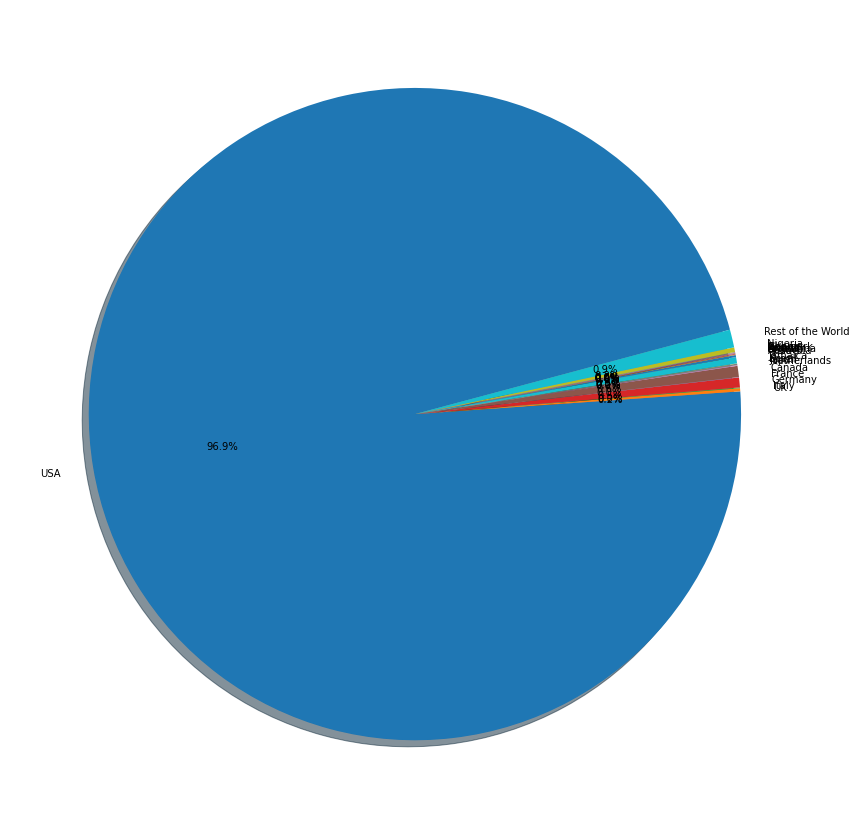

In [203]:
# Import libraries
# Let us plot a bigger view of pie chart for proper visibility

from matplotlib import pyplot as plt
import numpy as np
 
 
# Creating dataset
countries = x = dataframe["homeCountry"]
 
data = dataframe["Number of NFL Players"]
 
# Creating plot
fig = plt.figure(figsize =(60, 15))
plt.pie(data, labels = countries, autopct='%1.1f%%', startangle=15, shadow=True)
 
# show plot
plt.show()

## **5. Conclusion** <a id="5"></a>


### With a total of 15715 NFL players in our dataset, the following table shows the percentages of NFL players based on their various home country groupings.

- NFL players from USA represent 96.94% of the dataset
- NFL players from UK represent 0.15% of the dataset
- NFL players from Italy represent 0.04% of the dataset
- NFL players from Germany represent 0.49% of the dataset
- NFL players from France represent 0.02% of the dataset
- NFL players from Canada represent 0.55% of the dataset
- NFL players from Netherlands represent 0.03% of the dataset
- NFL players from Japan represent 0.07% of the dataset
- NFL players from Brazil represent 0.01% of the dataset
- NFL players from Jamaica represent 0.31% of the dataset
- NFL players from Australia represent 0.10% of the dataset
- NFL players from Spain represent 0.02% of the dataset
- NFL players from Argentina represent 0.01% of the dataset
- NFL players from Sweden represent 0.03% of the dataset
- NFL players from Poland represent 0.02% of the dataset
- NFL players from Norway represent 0.03% of the dataset
- NFL players from Denmark represent 0.01% of the dataset
- NFL players from Ghana represent 0.03% of the dataset
- NFL players from Nigeria represent 0.23% of the dataset
- NFL players from Rest of the World represent 0.90% of the dataset